In [8]:
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ssl
import numpy as np

from wifi_matrix import generate_A_higher_order, parse_image, pad_image, generate_A

In [2]:
wavelength = 0.06  # Wavelength of WiFi in meters: 0.12 for 2.5GHz; 0.06 for 5GHz.
k = 2 * np.pi / wavelength
n_air = 1
# n_concrete = 2.16 - 0.021j  # Should depend on wavenumber.
n_concrete = 2.5 - 1.0j * (
        2.5 * 0.2
    )

img = parse_image("testrom5.png", n_air, n_concrete)

In [3]:
%time A = generate_A_higher_order(img, k)

Wall time: 14.4 s


In [6]:
arr = A[500000-50 : 500000+50, 500000-50:500000+50].toarray()

C:\Users\KarlKristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


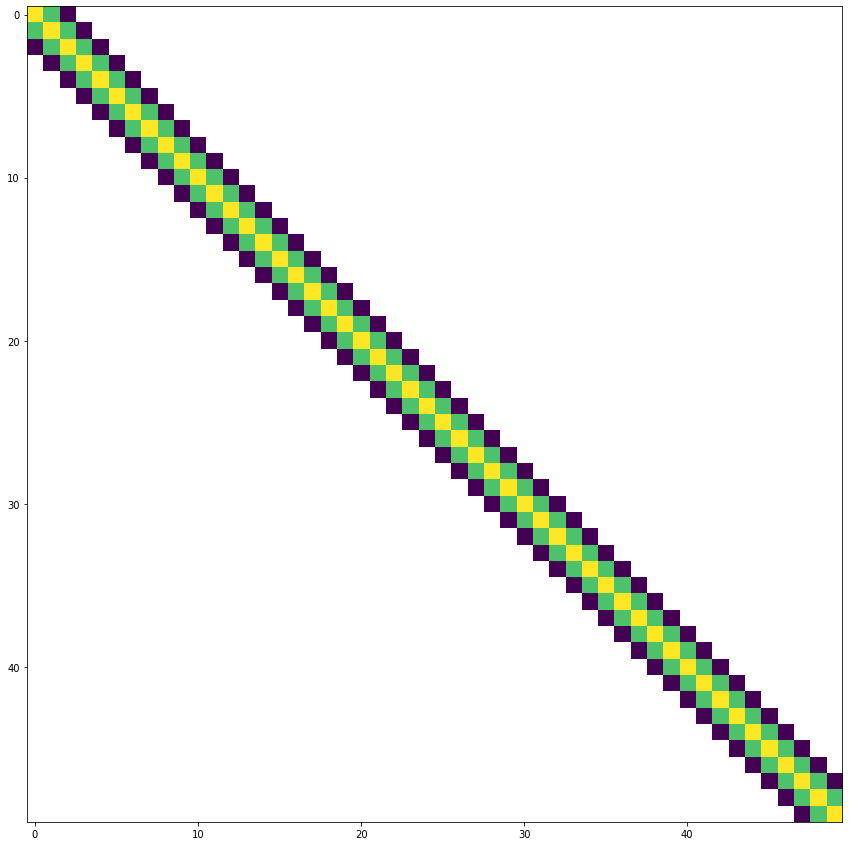

In [7]:
plt.figure(figsize = (15,15))
plt.imshow(np.log(np.abs(arr[:50,:50])))

In [11]:
f = np.ones((5, 5))

In [15]:
A = generate_A(f)
B = generate_A_higher_order(f)

C:\Users\KarlKristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\KarlKristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


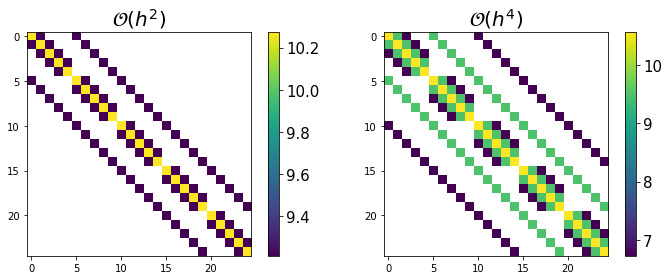

In [45]:
fig = plt.figure(figsize=(10, 4),tight_layout=True)

plt.subplot(121)
ax=plt.imshow(np.log(np.abs(A.toarray())))
plt.title(fr"$\mathcal{{O}}(h^2)$",size = 20)
cbar = fig.colorbar(ax)
cbar.ax.tick_params(labelsize=15)

plt.subplot(122)
ax =plt.imshow(np.log(np.abs(B.toarray())))
plt.title(fr"$\mathcal{{O}}(h^4)$", size = 20)
cbar = fig.colorbar(ax)
cbar.ax.tick_params(labelsize=15)
# plt.colorbar()